In [1]:
import numpy as np

In [2]:
segment_id=[193,119]
temp_substr='('
temp_substr+=','.join(map(str,segment_id))
temp_substr+=')'

str1=f"""
with df AS (
    SELECT *,
    ROW_NUMBER() OVER (ORDER BY RANDOM()) AS rn

    from "veraset"."veraset_visits_classified_users"
    and segmentation_id=1 and 
    segment_id in {temp_substr}
    )
    """
str1

'\nwith df AS (\n    SELECT *,\n    ROW_NUMBER() OVER (ORDER BY RANDOM()) AS rn\n\n    from "veraset"."veraset_visits_classified_users"\n    and segmentation_id=1 and \n    segment_id in (193,119)\n    )\n    '

In [3]:
years=3
cakes=5
# we will let yr 0 and yr 4 be in the cache as the stop criterion is set on t=4 yr and we intend to maintain consistency while caching yr and cakes based reward

cache=np.zeros(shape=(
    years+2,cakes+1
))#cake 6 nahi chahiye but year 4 chahiye to formulate the stop criterion


In [16]:
def reward(c,d):
  return (pow(0.7,d-1)*(pow(c,1/2)))

state_value=np.zeros(shape=(years+2,cakes+1))-1

for t in [3,2,1]:
  for ck in range(1,5+1):
    # rewrd---compute reward from stop criterion and chk all possible values of states and cache the statistic, here maximum, of all those possible answers
    lt_rewards=[]
    for ck_consumed in range(ck+1):#I can consume 0,1 till all the cakes
      temp_reward=reward(ck_consumed,t) + cache[t+1,ck-ck_consumed]
      lt_rewards.append(temp_reward)
    lt_rewards=np.asarray(lt_rewards)
    cache[t,ck]=np.max(lt_rewards)
    state_value[t,ck]=np.argmax(lt_rewards)




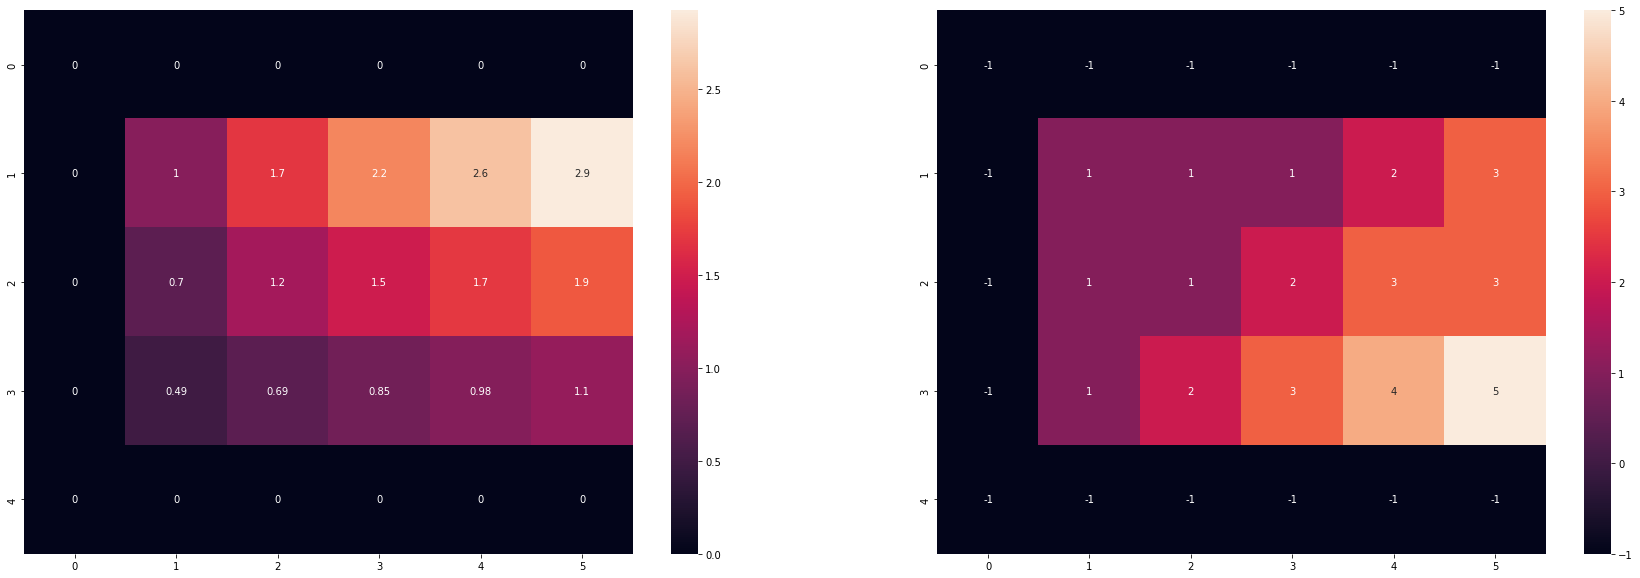

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(20,8))
f,ax=plt.subplots(1,2,figsize=(30,10))

sns.heatmap(cache,annot=True,ax=ax[0])
sns.heatmap(state_value,annot=True,ax=ax[1])

In [30]:
total_reward=0
ck_avail=cakes#On day 1 we have 5 cakes availaible
for t in range(1,4):
  print('reward on day {} is {} by consuming {} cakes'.format(t,cache[t,ck_avail],state_value[t,ck_avail]))
  total_reward+=cache[t,ck_avail]
  ck_avail=int(ck_avail-state_value[t,ck_avail])
  




reward on day 1 is 2.922050807568877 by consuming 3.0 cakes
reward on day 2 is 1.19 by consuming 1.0 cakes
reward on day 3 is 0.48999999999999994 by consuming 1.0 cakes


In [31]:
total_reward

4.602050807568878

In [34]:
# [i for i in range(-100)]

[]